In [63]:
%matplotlib inline

from skimage.io import imread, imshow, imsave
import numpy as np
from scipy.signal import convolve2d

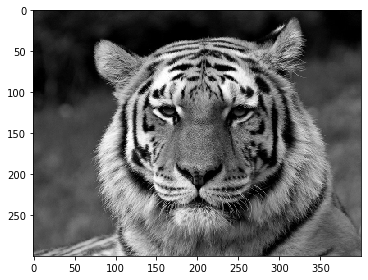

In [115]:
img = imread('images/tiger-gray-small.png')
imshow(img)

In [116]:
kernel = np.array([
        [-1, -2, -1],
        [-2, 22, -2],
        [-1, -2, -1]
    ])

In [117]:
coef = 1 / 10
kernel = kernel * coef

In [137]:
new_img = convolve2d(img, kernel, 'valid')

In [138]:
new_img = np.clip(new_img, 0, 255)

In [139]:
new_img = new_img.astype('uint8')

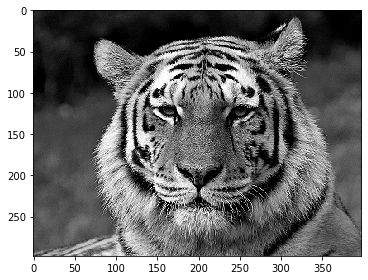

In [140]:
imshow(new_img)

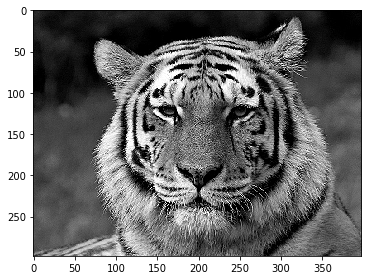

In [141]:
true_img = imread('images/unsharp-tiger.png')
imshow(true_img)

In [142]:
np.array_equal(true_img, new_img)

False

In [144]:
y, x = img.shape
k = 3

In [145]:
result_list = []
for i in range(y - k + 1):
    for j in range(x - k + 1):
        new_mtx = img[i: i + k, j: j + k]
        result = np.sum(new_mtx * kernel)
        result_list.append(result)

In [146]:
new_img_2 = np.array(result_list).reshape((298, 398))

In [147]:
new_img_2 = np.clip(new_img_2, 0, 255).astype('uint8')

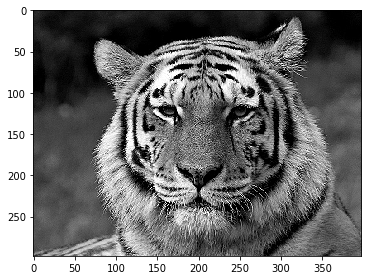

In [148]:
imshow(new_img_2)

In [149]:
np.array_equal(true_img, new_img_2)

True